# Datetime variables
Feature Engineering for Machine Learning Course

#Datetime variables take dates and / or time as values. For example, date of birth ('29-08-1987', '12-01-2012'), or date of application ('2016-Dec', '2013-March'). Datetime variables can contain dates only, times only, or dates and time.

We don't use datetime variables straightaway in machine learning because:

They contain a huge number of different values.
We can extract much more information from datetime variables by preprocessing them correctly.
Furthermore, date variables frequently include dates that were absent from the dataset used to train the machine learning model. In fact, date variables are frequently used to store dates that are in the future in comparison to the dates in the training dataset. As a result, because they were never seen while being trained, the machine learning model will have no idea what to do with the new values.
Feature Engineering for Machine Learning Course

Datetime variables take dates and / or time as values. For example, date of birth ('29-08-1987', '12-01-2012'), or date of application ('2016-Dec', '2013-March'). Datetime variables can contain dates only, times only, or dates and time.

We don't use datetime variables straightaway in machine learning because:

They contain a huge number of different values.
We can extract much more information from datetime variables by preprocessing them correctly.

Furthermore, date variables frequently include dates that were absent from the dataset used to train the machine learning model. In fact, date variables are frequently used to store dates that are in the future in comparison to the dates in the training dataset. As a result, because they were never seen while being trained, the machine learning model will have no idea what to do with the new values.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df = pd.read_csv("/home/lalitrajput/Tools/ML-Notes-and-Projects/Basic Machine Learning/FeatureEngg/Datasets/loan.csv")
df.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


In [6]:
df[['date_last_payment','date_issued']].dtypes

date_last_payment    object
date_issued          object
dtype: object

In [9]:
df['date_last_payment_dt']=pd.to_datetime(df['date_last_payment'])
df['date_issued_dt']=pd.to_datetime(df['date_issued'])
df[['date_last_payment_dt','date_last_payment','date_issued_dt','date_issued']]

,date_last_payment_dt,date_last_payment,date_issued_dt,date_issued
0,2016-01-14,2016-01-14,2013-06-11,2013-06-11
1,2016-01-25,2016-01-25,2014-05-08,2014-05-08
2,2014-09-26,2014-09-26,2013-10-26,2013-10-26
3,2016-01-26,2016-01-26,2015-08-20,2015-08-20
4,2016-01-11,2016-01-11,2014-07-22,2014-07-22
...,...,...,...,...
9995,2010-11-03,2010-11-03,2010-01-14,2010-01-14
9996,2016-01-26,2016-01-26,2015-03-20,2015-03-20
9997,2015-12-12,2015-12-12,2015-04-03,2015-04-03
9998,2016-01-01,2016-01-01,2014-11-23,2014-11-23


In [12]:
df['month'] = df['date_issued_dt'].dt.month
df['year'] = df['date_issued_dt'].dt.year

In [13]:
df['market'].unique()

array(['C', 'B', 'A', 'E', 'D'], dtype=object)

Text(0, 0.5, 'Disbursed amount')

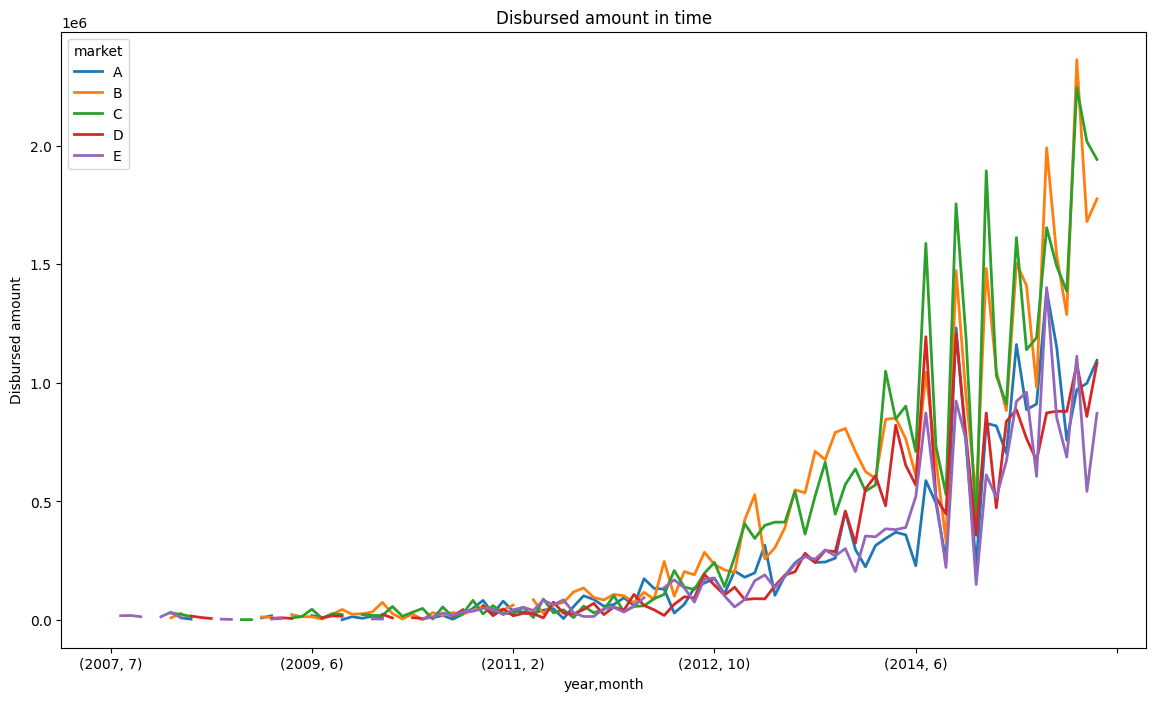

In [14]:
fig = df.groupby(['year','month','market'])['disbursed_amount'].sum().unstack().plot(figsize=(14,8),linewidth=2 )
fig.set_title("Disbursed amount in time")
fig.set_ylabel("Disbursed amount")

Text(24.000000000000007, 0.5, 'Disbursed amount')

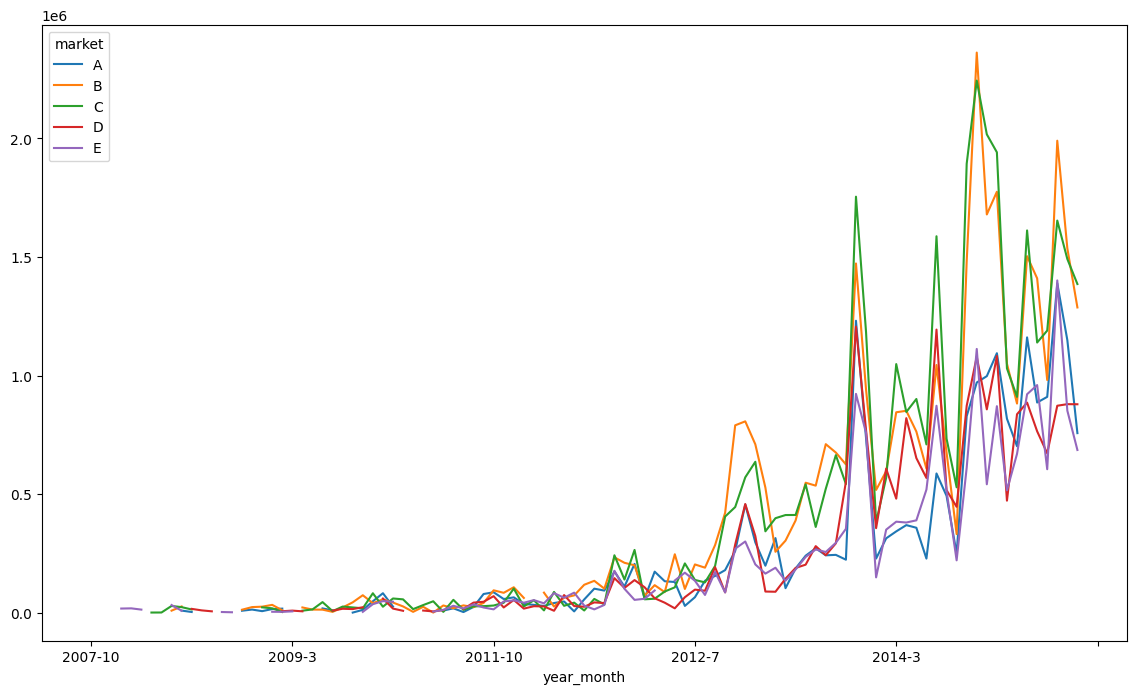

In [15]:
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str)

df.groupby(['year_month','market'])['disbursed_amount'] \
    .sum().unstack().plot(figsize=(14,8))
fig.set_title("Disbursed amount in time")
fig.set_ylabel("Disbursed amount")